In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
from collections import Counter
import nltk
import string
# search the text for a word
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.text import Text
from nltk.corpus import stopwords
from tqdm import tqdm
tqdm.pandas()

#To plot the graphs
#from wordcloud import WordCloud

#library used to count the frequency of words
from sklearn.feature_extraction.text import CountVectorizer

#To create the sentiment analysis model, tokenization and lemmatization
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize
import nltk.data
nltk.download('vader_lexicon')
nltk.download('punkt')

C:\Users\janek\.conda\envs\butterfly\lib\site-packages\tqdm\std.py:699: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\janek\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\janek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Analyze lyrics

In [2]:
lyrics = pd.read_pickle('../../files/pickle/lyricsenhanced.pkl')

In [5]:
lyrics.head()

,id,artist,title,year,lyrics,lang
0,1,Kollegah & Farid Bang,One Night Stand,2018,"Fass' dich an, frag', „Ist die Brust da echt?“...",de
1,2,Bausa,FML,2018,"Ouh-oh-oh-ouh-ouh\nBaby, ich weiß, was du will...",de
2,3,Jazn,Bombay,2018,"Jajajaja\nOhh, kippe Bombay\nJaja, jaja, ohh\n...",de
3,4,Tom Walker,Leave A Light On,2018,The second someone mentioned you were all alon...,en
4,5,G-Eazy feat. A$AP Rocky & Cardi B,No Limit,2018,"If I hit it one time, I'ma pipe her\nIf I hit ...",en


In [9]:
lyrics.shape

(1897, 6)

In [11]:
filter_df = pd.read_pickle('../../files/pickle/overview.pkl')

In [13]:
df = pd.merge(lyrics, filter_df['id'], how="inner", on=['id'], sort=False)
df

,id,artist,title,year,lyrics,lang
0,1,Kollegah & Farid Bang,One Night Stand,2018,"Fass' dich an, frag', „Ist die Brust da echt?“...",de
1,3,Jazn,Bombay,2018,"Jajajaja\nOhh, kippe Bombay\nJaja, jaja, ohh\n...",de
2,6,Liam Payne & Rita Ora,For You (Fifty Shades Freed),2018,Justin Timberlake - Filthy\nKendrick Lamar & S...,en
3,8,Justin Timberlake,Filthy,2018,"Hey, if you know what's good\nIf you know what...",en
4,9,Fard,Die Besten sterben jung,2018,"Yeah, Mitternacht und ich fang' wieder zu schr...",de
...,...,...,...,...,...,...
1799,1893,"Udo Mc Muff, Kreisligalegende & Ikke Hüftgold","Eine Muh, eine Mäh",2020,Wenn man mit den Freunden lacht\nWenn die Schw...,de
1800,1894,The Kid Laroi,Without You,2020,"You cut out a piece of me, and now I bleed int...",en
1801,1895,Michael Bublé,White Christmas,2020,I'm dreaming of a white Christmas\nJust like t...,en
1802,1896,Lil Lano,Luzifer,2020,"Ich will weg von hier, S-Class, Uber, hol mich...",de


In [25]:
df.isna().sum()

id        0
artist    0
title     0
year      0
lyrics    0
lang      1
dtype: int64

In [26]:
df = df[df['lang'].isna() == 0]

In [29]:
df['lyrics'].nunique()
df.shape

(1769, 6)

In [30]:
duplicates = pd.concat(g for _, g in df.groupby("lyrics") if len(g) > 1)
duplicates

,id,artist,title,year,lyrics,lang
1496,1582,Conkarah feat. Shaggy,Banana,2020,\n Lyrics for this song h...,en
1512,1598,Tujamo - Vize - Majan,Lonely,2020,\n Lyrics for this song h...,en
1583,1669,Ufo361,Playlist,2020,August 20205. August• Joker Bra — Ausziehen\n6...,de
1598,1684,Bausa x Juju,2012,2020,August 20205. August• Joker Bra — Ausziehen\n6...,de
1600,1686,Jamule x Chilla,13,2020,August 20205. August• Joker Bra — Ausziehen\n6...,de
1619,1705,Blackpink x Selena Gomez,Ice Cream,2020,Calvin Harris - Over Now (with The Weeknd)\nBL...,en
1624,1710,Topic x A7S feat. Lil Baby,Why Do You Lie To Me,2020,Calvin Harris - Over Now (with The Weeknd)\nBL...,en
673,752,Capital Bra x Samra,Wir ticken,2019,Eigene Musikvideos\n2016:\n• Die Eins (feat. A...,en
694,773,Luciano x Samra,Ya salame,2019,Eigene Musikvideos\n2016:\n• Die Eins (feat. A...,en
995,1074,Capital Bra x Samra,Nummer 1,2019,Eigene Musikvideos\n2016:\n• Die Eins (feat. A...,en


In [35]:
duplicates.lyrics.iloc[2]

'August 20205. August• Joker Bra — Ausziehen\n6. August• Shindy — Crispy\n7. August• AK Ausserkontrolle &\u2005Sonus030\u2005— Kristall 2\n•\u2005Alpa Gun & Eshtar — Was\u2005ist die Wahrheit\n•  ApoRed — Emblem\n• Azet & Albi — Xhep\n• Bato — Booty\n• Firat — NICHT DA\n• KC Rebell & Summer Cem — QN\n• Kianush — Kanake mit Stil\n• Kool Savas — AMG\n• Manuellsen — V-POWER\n• MEL — Göz Göze\n• Samra — 24 Stunden\n• Shindy — Crispy\n8. August• Capital Bra — Danke dir Bruder\n• Joker Bra — Kafa lalala\n11. August• Azet & Albi — Xhep (Remix) (feat. Mozzik)\n12. August• Azet & Albi — Xhep (Remix) (feat. Dhurata Dora)\n14. August• Cro — Fall auf\n• Eren Can — Frei sein\n• Fourty — Vor der Tür\n• Laas Unltd. — CRAZY\n• Kay Ay — Sag mir\n• Lune & Samra — CR1MINEL\n• Maestro — Mr. Miyagi\n• Mero — Perspektive\n• Mert — Mahale\n• Nimo — To the Moon\n• Trippie Boi — Will nicht\n• Ufo361 — Playlist\n21. August• 18 Karat — Gelb\n• Ahmad Amin — LWLS (feat. Noah)\n• Bausa — 2012 (feat. Juju)\n• Capita

In [36]:
import lyricsgenius
import getpass
from tqdm import tqdm


In [37]:
accesstoken = getpass.getpass()

········


In [38]:
client_access_token = accesstoken
genius = lyricsgenius.Genius(client_access_token, remove_section_headers=True,
                 skip_non_songs=True, excluded_terms=["Remix", "Live", "Edit", "Mix", "Club"])

In [45]:
manual_url = {1582: 'https://genius.com/Conkarah-banana-lyrics',
              1598: 'https://genius.com/Tujamo-and-vize-lonely-lyrics',
              1669: 'https://genius.com/Ufo361-and-sonus030-playlist-lyrics',
              1684: 'https://genius.com/Bausa-and-juju-2012-lyrics',
              1686: 'https://genius.com/Jamule-and-chilla-13-lyrics',
              1705: 'https://genius.com/Blackpink-and-selena-gomez-ice-cream-lyrics',
              1710: 'https://genius.com/Topic-and-a7s-why-do-you-lie-to-me-lyrics',
              752: 'https://genius.com/Capital-bra-and-samra-wir-ticken-lyrics',
              773: 'https://genius.com/Luciano-and-samra-ya-salame-lyrics',
              1074: 'https://genius.com/Capital-bra-and-samra-nummer-1-lyrics',
              1094: 'https://genius.com/Sido-samra-and-kool-savas-high-lyrics',
              1119: 'https://genius.com/Capital-bra-samra-and-lea-110-lyrics',
              1560: 'https://genius.com/Kalazh44-and-samra-kashira-lyrics',
              1587: 'https://genius.com/Bozza-and-samra-unbekannt-lyrics',
              1714: 'https://genius.com/Bozza-and-samra-al-qu-damm-lyrics',
              1271: 'https://genius.com/Kianush-and-pa-sports-streit-mit-dem-mond-lyrics',
              1374: 'https://genius.com/Kianush-and-pa-sports-cyberpunk-lyrics',
              1595: 'https://genius.com/Milonair-and-joker-bra-imma-gute-lyrics',
              1692: 'https://genius.com/Vize-joker-bra-and-leony-paradise-lyrics',
              1161: 'https://genius.com/Meduza-becky-hill-and-goodboys-lose-control-lyrics',
              1192: 'https://genius.com/The-black-eyed-peas-and-j-balvin-ritmo-bad-boys-for-life-lyrics',
              1610: 'https://genius.com/Maestro-deu-durch-die-nacht-lyrics',
              1625: 'https://genius.com/Ufo361-and-sonus030-shit-changed-lyrics',
              427: 'https://genius.com/Luciano-moneygram-lyrics',
              552: 'https://genius.com/Luciano-money-lyrics',
              1143: 'https://genius.com/Capital-bra-and-samra-berlin-lebt-wie-nie-zuvor-lyrics',
              1378: 'https://genius.com/Samra-and-capital-bra-berlin-lyrics',
             }

'https://genius.com/Conkarah-banana-lyrics'

In [47]:
manual_lyrics = {}

for k,v in manual_url.items():
    try:
        song_lyrics = genius.lyrics(v)
        manual_lyrics[k] = song_lyrics
    except:
        manual_lyrics[k] = np.nan

In [49]:
for k,v in manual_lyrics.items():
    df.loc[df['id'] == k, ['lyrics']] = v

In [51]:
df.to_pickle("../../files/pickle/lyricsbasis.pkl")

In [2]:
df = pd.read_pickle("../../files/pickle/lyricsbasis.pkl")

### Analyze all lyrics

In [3]:
df.shape

(1769, 6)

In [4]:
df = df.dropna(subset=['lyrics'])

In [5]:
df.shape

(1768, 6)

In [6]:
df.year.value_counts()

2019    618
2020    608
2018    542
Name: year, dtype: int64

### Reduce data set to only include songs from 2019 & 2020

In [7]:
df = df[(df['year'] > 2018)]

In [8]:
df.year.value_counts()

2019    618
2020    608
Name: year, dtype: int64

### German Songs Analysis

In [9]:
df_de = df[(df['lang'] == "de")]

In [10]:
df_de.shape

(791, 6)

In [11]:
df_de.year.value_counts()

2019    400
2020    391
Name: year, dtype: int64

### Translate German lyrics for VADER analysis

In [48]:
pip install google_trans_new

Note: you may need to restart the kernel to use updated packages.


In [70]:
from google_trans_new import google_translator  

def translate(x):
    translator = google_translator()  
    translate_text = translator.translate(x,lang_tgt='en')
    return translate_text

In [71]:
df_de['translation'] = df_de['lyrics'].progress_apply(translate)

100%|████████████████████████████████████████████████████████████████████████████████| 791/791 [03:35<00:00,  3.67it/s]
<ipython-input-71-7918721f9b38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_de['translation'] = df_de['lyrics'].progress_apply(translate)


,id,artist,title,year,lyrics,lang,translation
0,629,"LX & Maxwell feat. Bonez MC, Gzuz & Sa4",HaifischNikez Allstars,2019,"Frische Sneaker, ja, genauso muss das sein\nDo...",de,"Fresh sneakers, yes, that's how it has to be\n..."
1,630,Kerstin Ott & Helene Fischer,Regenbogenfarben,2019,Hast du schon ein'n Regenbogen in schwarz-weiß...,de,Have you already seen a rainbow in black and w...
2,632,Nimo & Capo,Anderes Niveau,2019,"Aah (uhh)\nAah (uhh)\nAh (uhh)\nAh, la la la l...",de,"Aah (uhh)\nAah (uhh)\nAh (uhh)\nAh, la la la l..."
3,633,Nash & Azet,"Crack, Koks, Piece Unternehmen",2019,"Millimètres, Minivan\nDope-Chef, Lucry\n\nJa, ...",de,"Millimeters, minivan\nDope boss, Lucry\n\nYes,..."
4,634,Capo feat. Nimo,Lambo Diablo GT,2019,"Ahh, ahh, ahh\nYeah, yeah\nWua, wua, wua, wua\...",de,"Ahh, ahh, ahh\nYeah yeah\nWua, wua, wua, wua\n..."
...,...,...,...,...,...,...,...
786,1890,"Bausa, RIN & Ufo361",Centre Court,2020,Ah-ah-ah\nAh-ah-ah\n\nAus 'ner Kleinstadt auf ...,de,Ah-ah-ah\nAh-ah-ah\n\nFrom a small town to the...
787,1892,Jamule,Blutige Tränen x Rockstar,2020,Was eine Reise!\nHab' blaue Flecken von den St...,de,What a trip!\nI've got bruises from the stones...
788,1893,"Udo Mc Muff, Kreisligalegende & Ikke Hüftgold","Eine Muh, eine Mäh",2020,Wenn man mit den Freunden lacht\nWenn die Schw...,de,When you laugh with your friends\nWhen the rin...
789,1896,Lil Lano,Luzifer,2020,"Ich will weg von hier, S-Class, Uber, hol mich...",de,"I want to get out of here, S-Class, Uber, pick..."


#### Sentiment analysis using VADER for english lyrics

In [24]:
#lyricsstrict_en = lyricsstrict[lyricsstrict['lang'] == "en"].reset_index(drop=True)

In [75]:
#Sentiment Analysis using VADER Sentiment Intensity Model

#Create lists to store the different scores for each word
negative = []
neutral = []
positive = []
compound = []

#Initialize the model
sid = SentimentIntensityAnalyzer()

#Iterate for each row of lyrics and append the scores
for i in df_de.index:
    scores = sid.polarity_scores(df_de['translation'].iloc[i])
    negative.append(scores['neg'])
    neutral.append(scores['neu'])
    positive.append(scores['pos'])
    compound.append(scores['compound'])
    
#Create 4 columns to the main data frame for each score 
df_de['negative'] = negative
df_de['neutral'] = neutral
df_de['positive'] = positive
df_de['compound'] = compound

#### Create a graphic showing lyric sentiments for all songs

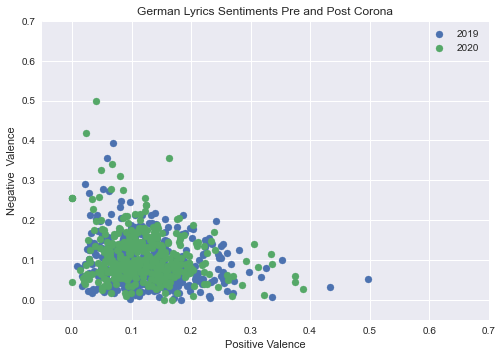

<Figure size 576x396 with 0 Axes>

In [76]:
for name, group in df_de.groupby('year'):
    plt.scatter(group['positive'],group['negative'],label=name)
    plt.legend(fontsize=10)

plt.xlim([-0.05,0.7])
plt.ylim([-0.05,0.7])

plt.title("German Lyrics Sentiments Pre and Post Corona")
plt.xlabel('Positive Valence')
plt.ylabel('Negative  Valence')
plt.show()

plt.savefig('../../graphics/lyric_sentiment_de.png', transparent=False, bbox_inches='tight')

#### Create a graphic showing mean lyric sentiments for all songs

In [77]:
means_df_de = df_de.groupby(['year']).mean()
means_df_de

,id,negative,neutral,positive,compound
year,,,,,
2019,949.645000,0.096385,0.777853,0.125770,0.203755
2020,1584.263427,0.109609,0.769514,0.120882,0.075708


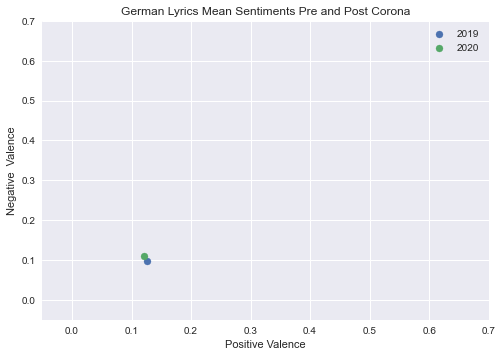

<Figure size 576x396 with 0 Axes>

In [78]:
for name, group in means_df_de.groupby('year'):
    plt.scatter(group['positive'],group['negative'], label=name)
    plt.legend()
    
plt.xlim([-0.05,0.7])
plt.ylim([-0.05,0.7])
plt.title("German Lyrics Mean Sentiments Pre and Post Corona")
plt.xlabel('Positive Valence')
plt.ylabel('Negative  Valence')

plt.show()

plt.savefig('../../graphics/lyric_sentiment_mean_de.png', transparent=False, bbox_inches='tight')

### Frequency analysis of German lyrics

In [12]:
def docgerman(x):
    import spacy
    nlp_german = spacy.load('de_core_news_lg')
    doc = nlp_german(x)
    return doc

  

In [17]:
import spacy
nlp_german = spacy.load('de_core_news_lg')

def lemmatize_german(x):
    nlp_german = spacy.load('de_core_news_lg')
    temp_list = []
    for word in x:
        doc = nlp_german(word)
        result = ' '.join([i.lemma_ for i in doc])
        temp_list.append(result)
    
    return temp_list

In [22]:
import spacy
nlp_german = spacy.load('de_core_news_lg')

def lemmatize_german(x):
    nlp_german = spacy.load('de_core_news_lg')
    doc = nlp_german(x)
    for token in doc:
        print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.shape_, token.is_alpha, token.is_stop)

In [23]:
df_de['lyrics'].iloc[0:1].apply(lemmatize_german)

Frische frischen ADJ ADJA nk Xxxxx True False
Sneaker Sneaker NOUN NN re Xxxxx True False
, , PUNCT $, punct , False False
ja ja ADV ADV par xx True True
, , PUNCT $, punct , False False
genauso genauso ADV ADV mo xxxx True False
muss muss VERB VMFIN ROOT xxxx True True
das der PRON PDS sb xxx True True
sein mein AUX VAINF oc xxxx True True

 
 SPACE _SP  
 False False
Doch doch CCONJ KON ju Xxxx True True
hänge hänge VERB VVFIN cj xxxx True False
nur nur ADV ADV mo xxx True True
zuhause zuhause ADV ADV mo xxxx True False
, , PUNCT $, punct , False False
bin sein AUX VAFIN ROOT xxx True True
am am ADP APPRART mo xx True True
barzen barzen NOUN NN nk xxxx True False
, , PUNCT $, punct , False False
geh geh PROPN NE cj xxx True False
' ' PUNCT $( punct ' False False
nur nur ADV ADV mo xxx True True
raus raus ADP PTKVZ svp xxxx True False
, , PUNCT $, punct , False False
um um SCONJ KOUI mnr xx True True
zu zu PART PTKZU mo xx True True
verteil verteil VERB VVINF nk xxxx True False
’ ’ PR

abgewickelt abwickeln VERB VVPP oc xxxx True False
, , PUNCT $, punct , False False
so so ADV ADV mo xx True True
wie wie CCONJ KOKOM cm xxx True True
Bandagen Bandage NOUN NN cc Xxxxx True False

 
 SPACE _SP  
 False False
600-Watt-Lampen 600-Watt-Lampen NOUN NN cj ddd-Xxxx-Xxxxx False False
, , PUNCT $, punct , False False
Hanfpflanzen Hanfpflanzen NOUN NN oa Xxxxx True False
anpflanzen anpflanzen VERB VVFIN rc xxxx True False

 
 SPACE _SP  
 False False
Goldketten Goldketten NOUN NN cj Xxxxx True False
, , PUNCT $, punct , False False
Goldplatten Goldplatten NOUN NN cj Xxxxx True False
, , PUNCT $, punct , False False
Johnnys Johnnys PROPN NE cj Xxxxx True False
dick dick ADJ ADJD pd xxxx True False
wie wie CCONJ KOKOM cm xxx True True
Tannenzapfen Tannenzapfen NOUN NN cc Xxxxx True False


 

 SPACE _SP  

 False False
187 187 NUM CARD pnc ddd False False
, , PUNCT $, punct , False False
besser gut ADJ ADJD mo xxxx True True
merk merk VERB VVFIN cj xxxx True False
dir sich PRON P

551    None
Name: lyrics, dtype: object

In [27]:
df_de['spacy_doc'] = df_de['lyrics'].progress_apply(docgerman)

  6%|█████                                                                          | 51/791 [05:57<1:26:34,  7.02s/it]


MemoryError: Unable to allocate 572. MiB for an array with shape (150000000,) and data type float32

#### Split lyrics text into a list of words, remove whitespace, quotes/punctuation and lowercase words in list

In [24]:
def gen_clean(x):
    
    #some cleaning - create table of punctuation from module string 
    punctable = str.maketrans('', '', string.punctuation)
    
    #remove punctuation   
    x = x.translate(punctable)
    
    #remove breaks & quotation marks and change words to lower case
    x = x.replace('\n', ' ').replace('„', '').replace('“', '').lower()
    
    #Split text into words
    x = x.split()
    
    #return cleaned output
    return x

In [25]:
df_de['words'] = df_de['lyrics'].apply(gen_clean)

<ipython-input-25-dd4e5841c353>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_de['words'] = df_de['lyrics'].apply(gen_clean)


#### Remove stopwords from several languages used most frequently in German Charts songs

In [26]:
def stopgerman(x):
    cleaned = [word for word in x if not word in stopwords.words('german')]
    return cleaned

In [27]:
def stopenglish(x):
    cleaned = [word for word in x if not word in stopwords.words('english')]
    return cleaned

In [28]:
def stopfrench(x):
    cleaned = [word for word in x if not word in stopwords.words('french')]
    return cleaned

In [29]:
def stopspanish(x):
    cleaned = [word for word in x if not word in stopwords.words('spanish')]
    return cleaned

In [30]:
def stopitalian(x):
    cleaned = [word for word in x if not word in stopwords.words('italian')]
    return cleaned

In [31]:
def stopturkish(x):
    cleaned = [word for word in x if not word in stopwords.words('turkish')]
    return cleaned

In [32]:
#Apply functions to remove stopwords of relevant languages from lyrics
df_de['words'] = df_de['words'].apply(stopgerman)
df_de['words'] = df_de['words'].apply(stopenglish)
df_de['words'] = df_de['words'].apply(stopfrench)
df_de['words'] = df_de['words'].apply(stopspanish)
df_de['words'] = df_de['words'].apply(stopitalian)
df_de['words'] = df_de['words'].apply(stopturkish)

KeyboardInterrupt: 

In [ ]:
df_de.head(10)

In [25]:
df_de.to_pickle("../../files/pickle/germanlyrics.pkl")

In [33]:
df_de = pd.read_pickle("../../files/pickle/germanlyrics.pkl")

In [35]:
pip install textblob-de

  Using cached textblob-0.15.3-py2.py3-none-any.whl (636 kB)
Note: you may need to restart the kernel to use updated packages.


In [37]:
from textblob_de import TextBlobDE as TextBlob

def textblob_lemmatizer(doclist):
    """Takes a list of strings as input and returns a list of lemmatized strings"""
    docs=[]
    for doc in doclist:
        blob = TextBlob(doc)
        docs.append(' '.join(list(blob.words.lemmatize())))

    return docs

In [40]:
df_de['lemma'] = df_de['words'].progress_apply(textblob_lemmatizer)

100%|██████████████████████████████████████████████████████████████████████████████| 1097/1097 [04:03<00:00,  4.50it/s]


#### Create column with lists containing only unique words from lyrics

In [41]:
def unique_words(x):
    u = list(set(x))
    return u

In [42]:
df_de['unique_lemma'] = df_de['lemma'].progress_apply(unique_words)

100%|███████████████████████████████████████████████████████████████████████████| 1097/1097 [00:00<00:00, 38260.03it/s]


In [45]:
df_de['unique_lemma'].iloc[1]

['danach',
 'Killer',
 '¡Hola',
 'Cubana',
 'Lebron',
 'High',
 'Drogenmissbrauch',
 'Glas',
 'Rocken',
 'Problem',
 '247',
 'sagen',
 'Uh',
 'Pradabandana',
 'flaschen',
 'Fraun',
 'immer',
 'Kanaks',
 'Hotelzimmer',
 'machen',
 'Geh',
 'Bademantel',
 'Fairness',
 'Gras',
 'Kippe',
 'Falln',
 'Nase',
 'Schüsse',
 'mischen',
 'Pasa',
 'Fresh',
 'stehen',
 'Vay',
 'Dope',
 'voraus',
 'Jajajaja',
 'day',
 'Bro',
 'Bonita',
 'Gib',
 'Komm',
 'Ey',
 'meim',
 'Boss',
 'Nimm',
 'Zähln',
 'Ego',
 'Dominos',
 'bleiben',
 'Venn',
 'Fuego',
 'Hälfte',
 'Airwaves',
 'gekippt',
 'drauf',
 'Blunt',
 'wer',
 'Verdienn',
 'Überfall',
 'Gift',
 'verzichten',
 'schon',
 'Bombay',
 'Roll',
 'Patte',
 'Dicka',
 'Ohh',
 'zustehen',
 'Filme',
 'Adrenalin',
 'eins',
 'Blut',
 'James',
 'Cohiba',
 'Pumpt',
 'ja',
 'gar',
 'na',
 'egal',
 'Haze',
 'ah',
 'Digga',
 'Gelaunt',
 'schwertfisch',
 'Gin',
 'Bestehn',
 'Beherrsch',
 'Mathematik',
 'Auge',
 'Simple',
 'Artillerie',
 'Santana',
 'Mann',
 'Oj',
 'Riina

In [8]:
import spacy
nlp_german = spacy.load('de_core_news_lg')

def lemmatize_german(x):
    nlp_german = spacy.load('de_core_news_lg')
    temp_list = []
    for word in x:
        doc = nlp_german(word)
        result = ' '.join([i.lemma_ for i in doc])
        temp_list.append(result)
    return temp_list

In [50]:
df_de['lemmatized'] = df_de['unique_words'].progress_apply(lemmatize_german)

  1%|▉                                                                             | 14/1097 [02:14<2:53:19,  9.60s/it]


KeyboardInterrupt: 

In [51]:
df_de.to_pickle("../../files/pickle/germanlyrics2.pkl")

In [ ]:
df_de = pd.read_pickle("../../files/pickle/germanlyrics2.pkl")

In [53]:
germanlist = []

for song in df_de['unique_words']:
    germanlist.extend(song)
    
dict_de = {'words': germanlist}

In [54]:
wordlist_de = pd.DataFrame(dict_de)

In [56]:
wordlist_de.to_csv("../../files/csv/germanwordstrial.csv")

In [37]:
df_de.lemmatized.iloc[1]

['jajajaja',
 'ohh',
 'kippe',
 'bombay',
 'jaja',
 'jaja',
 'ohh',
 'kippe',
 'bombay',
 'ah',
 'kippe',
 'bombay',
 'glas',
 'geben',
 'mischen',
 'oj',
 'ah',
 'mischen',
 'oj',
 'meim',
 'gras',
 'ja',
 'kippe',
 'bombay',
 'gift',
 'kippen',
 'egal',
 'geben',
 'mischen',
 'oj',
 'wer',
 'sagen',
 'mann',
 'leb',
 'ja',
 'hälfte',
 'blunt',
 'killer',
 'gelaunt',
 'dicka',
 'killer',
 'gelaunt',
 'ey',
 'drogenmissbrauch',
 'hotelzimmer',
 'fraun',
 'digga',
 'immer',
 'drauf',
 'ey',
 '¡ hola',
 'bonita',
 'bring',
 'gin',
 'cohiba',
 'bademantel',
 'boss',
 'totò',
 'riina',
 'kanaks',
 'schieben',
 'filme',
 'schon',
 'adrenalin',
 'pumpen',
 'blut',
 'venn',
 'artillerie',
 'bleiben',
 'immer',
 'bestehn',
 'patte',
 'verdienn',
 'danach',
 'zähln',
 'simpel',
 'mathematik',
 'digga',
 'gar',
 'problem',
 'jaja',
 'fresh',
 'airwaves',
 'nehmen',
 'zustehen',
 'verzichte',
 'fairness',
 'sagen',
 'beherrsch',
 'geh',
 'nase',
 'voraus',
 'schwertfisch',
 'kippe',
 'bombay',
 '

#### Create column with lists containing only unique words from lyrics

In [ ]:
def unique_words(x):
    u = list(set(x))
    return u

In [ ]:
df_de['unique_words'] = df_de['words'].apply(unique_words)

In [19]:
df_de.head(10)

,id,artist,title,year,lyrics,lang,words,clean2
0,1,Kollegah & Farid Bang,One Night Stand,2018,"Fass' dich an, frag', „Ist die Brust da echt?“...",de,"[fass, dich, an, frag, ist, die, brust, da, ec...","[fass, frag, brust, echt, tanz, schubst, grund..."
1,3,Jazn,Bombay,2018,"Jajajaja\nOhh, kippe Bombay\nJaja, jaja, ohh\n...",de,"[jajajaja, ohh, kippe, bombay, jaja, jaja, ohh...","[jajajaja, ohh, kippe, bombay, jaja, jaja, ohh..."
4,9,Fard,Die Besten sterben jung,2018,"Yeah, Mitternacht und ich fang' wieder zu schr...",de,"[yeah, mitternacht, und, ich, fang, wieder, zu...","[yeah, mitternacht, fang, schreiben, gottverda..."
7,16,Azet,9 Milly,2018,"A-Boom, Fast Life, Azet, Neunmilli\nTicken wie...",de,"[aboom, fast, life, azet, neunmilli, ticken, w...","[aboom, fast, life, azet, neunmilli, ticken, n..."
8,17,Fler feat. Farid Bang,AMG,2018,"Was uns verbindet, ist der AMG (nicht AMG-Pake...",de,"[was, uns, verbindet, ist, der, amg, nicht, am...","[verbindet, amg, amgpaket, junge, 63, amg, 63,..."
9,18,RIN,Data Love,2018,"Bae, ich hab' kein'n Empfang, jaja\nDoch wenn ...",de,"[bae, ich, hab, keinn, empfang, jaja, doch, we...","[bae, keinn, empfang, jaja, schreibst, live, b..."
14,25,Eno,Wäwä,2018,Wäwä\nWäwä\nNa na na na na\n\nWir fahren nach ...,de,"[wäwä, wäwä, na, na, na, na, na, wir, fahren, ...","[wäwä, wäwä, na, na, na, na, na, fahren, amste..."
20,34,Olexesh,Gopnik,2018,"Bounce, Bounce, Bounce, Bounce\nBounce, Bounce...",de,"[bounce, bounce, bounce, bounce, bounce, bounc...","[bounce, bounce, bounce, bounce, bounce, bounc..."
22,36,Rico feat. Bausa,Junkie,2018,Du stehst an der Bar und du wartest nur drauf\...,de,"[du, stehst, an, der, bar, und, du, wartest, n...","[stehst, bar, wartest, drauf, zahlt, geb, kein..."
24,38,18 Karat,Versace,2018,"Ich kauf' mir die ganze Modeboutique, auch ohn...",de,"[ich, kauf, mir, die, ganze, modeboutique, auc...","[kauf, ganze, modeboutique, musik, großen, sti..."


In [46]:
df_de.words.iloc[2]

['yeah',
 'mitternacht',
 'und',
 'ich',
 'fang',
 'wieder',
 'zu',
 'schreiben',
 'an',
 'gottverdammt',
 'mann',
 'wie',
 'schnell',
 'ist',
 'all',
 'die',
 'zeit',
 'vergangn',
 'wir',
 'waren',
 'jung',
 'und',
 'vielleicht',
 'sind',
 'wir',
 'zu',
 'weit',
 'gegangn',
 'doch',
 'ohne',
 'dich',
 'fühlt',
 'sich',
 'das',
 'alles',
 'hier',
 'so',
 'einsam',
 'an',
 'was',
 'würd',
 'ich',
 'dafür',
 'geben',
 'dich',
 'nochmal',
 'in',
 'den',
 'arm',
 'zu',
 'nehmen',
 'ein',
 'letztes',
 'mal',
 'heimlich',
 'trinken',
 'und',
 'auf',
 'party',
 'gehen',
 'leute',
 'blamieren',
 'und',
 'dann',
 'fragen',
 'ob',
 'sie',
 'spaß',
 'verstehn',
 'doch',
 'stattdessen',
 'bleibt',
 'mir',
 'nur',
 'vor',
 'deinem',
 'grab',
 'zu',
 'stehn',
 'und',
 'ich',
 'sprech',
 'zu',
 'dir',
 'als',
 'würdst',
 'du',
 'grade',
 'vor',
 'mir',
 'stehn',
 'und',
 'frage',
 'dich',
 'vielleicht',
 'könnn',
 'wir',
 'uns',
 'ja',
 'morgen',
 'sehn',
 'das',
 'klingt',
 'verrückt',
 'ich',
 'wei

In [14]:
#count freq of words in the text 

from nltk.probability import FreqDist

fdistlyrics1 = FreqDist(lyrics['words'][3])
fdistlyrics1.most_common(20)


[('leave', 13),
 ('light', 13),
 ('youve', 6),
 ('feel', 5),
 ('lost', 5),
 ('way', 5),
 ('place', 4),
 ('youll', 4),
 ('grace', 4),
 ('dont', 3),
 ('look', 3),
 ('distance', 3),
 ('theres', 3),
 ('house', 3),
 ('upon', 3),
 ('hill', 3),
 ('guidin', 3),
 ('like', 3),
 ('lighthouse', 3),
 ('safe', 3)]

#### Add information about month and week from another dataframe

In [15]:
overview = pd.read_pickle("../../files/pickle/overview.pkl")

#### Create a new balanced dataframe
*Only songs are used from the years 2019-2020 as well as from any month except December*

In [16]:
overview = overview[['id', 'month', 'week']]
lyricsstrict = pd.merge(lyrics, overview, how='left', on=['id'],
                         sort=False)
lyricsstrict = lyricsstrict[(lyricsstrict['year'] > 2018) & (lyricsstrict['month'] < 12)]
lyricsstrict = lyricsstrict.dropna()

In [17]:
lyricsstrict.isna().sum()

id        0
artist    0
title     0
year      0
lyrics    0
lang      0
words     0
month     0
week      0
dtype: int64

In [18]:
lyricsstrict.shape

(1158, 9)

In [19]:
lyricsstrict = lyricsstrict.reset_index(drop=True)

#### Sentiment analysis using VADER for english lyrics

In [24]:
lyricsstrict_en = lyricsstrict[lyricsstrict['lang'] == "en"].reset_index(drop=True)

In [25]:
#Sentiment Analysis using VADER Sentiment Intensity Model

#Create lists to store the different scores for each word
negative = []
neutral = []
positive = []
compound = []

#Initialize the model
sid = SentimentIntensityAnalyzer()

#Iterate for each row of lyrics and append the scores
for i in lyricsstrict_en.index:
    scores = sid.polarity_scores(lyricsstrict_en['lyrics'].iloc[i])
    negative.append(scores['neg'])
    neutral.append(scores['neu'])
    positive.append(scores['pos'])
    compound.append(scores['compound'])
    
#Create 4 columns to the main data frame  for each score 
lyricsstrict_en['negative'] = negative
lyricsstrict_en['neutral'] = neutral
lyricsstrict_en['positive'] = positive
lyricsstrict_en['compound'] = compound

#### Create a graphic showing lyric sentiments for all songs

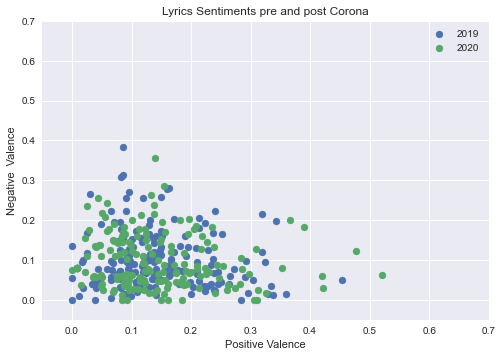

<Figure size 576x396 with 0 Axes>

In [26]:
for name, group in lyricsstrict_en.groupby('year'):
    plt.scatter(group['positive'],group['negative'],label=name )
    plt.legend(fontsize=10)

plt.xlim([-0.05,0.7])
plt.ylim([-0.05,0.7])

plt.title("Lyrics Sentiments pre and post Corona")
plt.xlabel('Positive Valence')
plt.ylabel('Negative  Valence')
plt.show()

plt.savefig('../../graphics/lyric_sentiment_en.png', transparent=False, bbox_inches='tight')

#### Create a graphic showing mean lyric sentiments for all songs

In [27]:
means_lyricsstrict_en = lyricsstrict_en.groupby(['year']).mean()
means_lyricsstrict_en

,id,month,week,negative,neutral,positive,compound
year,,,,,,,
2019,920.271739,5.820652,23.380435,0.098826,0.760549,0.140609,0.328477
2020,1543.982759,5.856322,23.913793,0.097575,0.758006,0.144368,0.257760


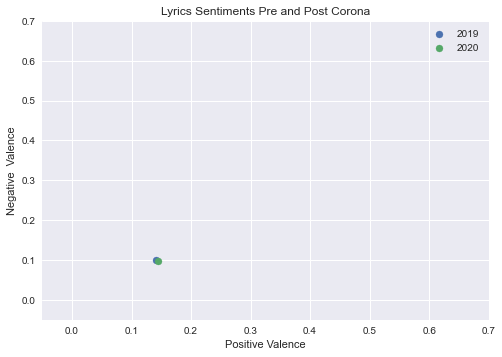

<Figure size 576x396 with 0 Axes>

In [28]:
for name, group in means_lyricsstrict_en.groupby('year'):
    plt.scatter(group['positive'],group['negative'], label=name)
    plt.legend()
    
plt.xlim([-0.05,0.7])
plt.ylim([-0.05,0.7])
plt.title("Lyrics Sentiments Pre and Post Corona")
plt.xlabel('Positive Valence')
plt.ylabel('Negative  Valence')

plt.show()

plt.savefig('../../graphics/lyric_sentiment_mean_en.png', transparent=False, bbox_inches='tight')

#### Save dataframe

In [29]:
lyrics.to_csv("../../files/csv/lyricstokenized.csv")
lyrics.to_pickle("../../files/pickle/lyricstokenized.pkl")

In [29]:
pip install spacy-sentiws

  Created wheel for spacy-sentiws: filename=spacy_sentiws-0.0.6-py3-none-any.whl size=3543 sha256=ebacff5f161fe6de37b3d36755de94d303ccc450cdadc63626fb740f883cefbf
  Stored in directory: c:\users\janek\appdata\local\pip\cache\wheels\f3\17\80\7ca17de6569bf7f4b857c0c0f1c81b385de1a4ff1dbd8dc8b7
Successfully built spacy-sentiws
Note: you may need to restart the kernel to use updated packages.


In [34]:
import spacy
from spacy_sentiws import spaCySentiWS

nlp = spacy.load('de_core_news_lg')
sentiws = spaCySentiWS(sentiws_path='../../../sentiment-analysis')
nlp.add_pipe(sentiws)
doc = nlp(df_de['lyrics'].iloc[0])

for token in doc:
    print('{}, {}, {}'.format(token.text, token._.sentiws, token.pos_))

Frische, None, ADJ
Sneaker, None, NOUN
,, None, PUNCT
ja, None, ADV
,, None, PUNCT
genauso, None, ADV
muss, None, VERB
das, None, PRON
sein, None, AUX

, None, SPACE
Doch, None, CCONJ
hänge, None, VERB
nur, None, ADV
zuhause, None, ADV
,, None, PUNCT
bin, None, AUX
am, None, ADP
barzen, None, NOUN
,, None, PUNCT
geh, None, PROPN
', None, PUNCT
nur, None, ADV
raus, None, ADP
,, None, PUNCT
um, None, SCONJ
zu, None, PART
verteil, None, VERB
’, None, PROPN
n, None, X

, None, SPACE
Er, None, PRON
macht, None, VERB
ausladende, None, ADJ
Aussagen, None, NOUN
,, None, PUNCT
worauf, None, ADV
warten, None, VERB
?, None, PUNCT

, None, SPACE
Ich, None, PRON
komm, None, VERB
', None, PUNCT
vorbei, None, ADV
und, None, CCONJ
hau, None, X
', None, PUNCT
ihm, None, PRON
eine, None, DET
rein, 0.004, ADJ
(, None, PUNCT
haha, None, X
), None, PUNCT

, None, SPACE
Alles, None, PRON
,, None, PUNCT
was, None, PRON
ich, None, PRON
wollte, None, VERB
,, None, PUNCT
war, None, AUX
ein, None, DET
Benz, None

In [ ]:


translations = translator.translate(['The quick brown fox', 'jumps over', 'the lazy dog'], dest='ko')